# 데이터시각화 특강 기말 예상문제 (ver 0.6)
> 

- toc:false
- branch: master
- badges: true
- comments: false
- author: 최서연
- categories: [final]

In [22]:
#hide
import requests
import pandas as pd
from IPython.display import HTML
import plotly.express as px
import numpy as np
import json

(풀이1)

## `#3`. COVID19 시도별/일별 감염자수 시각화

아래는 COVID19 확진자수를 지역별로 매일 기록한 자료이다. (`#2`와 동일한 자료임)
```
https://raw.githubusercontent.com/guebin/2021DV/master/_notebooks/covid19_20211202.csv
```
자료를 판다스로 불러온 결과는 아래와 같다. 

In [23]:
df=pd.read_csv('https://raw.githubusercontent.com/guebin/2021DV/master/_notebooks/covid19_20211202.csv')

In [24]:
#hide_input
HTML('<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>일자</th>\n      <th>계(명)</th>\n      <th>서울</th>\n      <th>부산</th>\n      <th>대구</th>\n      <th>인천</th>\n      <th>광주</th>\n      <th>대전</th>\n      <th>울산</th>\n      <th>세종</th>\n      <th>경기</th>\n      <th>강원</th>\n      <th>충북</th>\n      <th>충남</th>\n      <th>전북</th>\n      <th>전남</th>\n      <th>경북</th>\n      <th>경남</th>\n      <th>제주</th>\n      <th>검역</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>0</th>\n      <td>누적(명)</td>\n      <td>457,612</td>\n      <td>158,774</td>\n      <td>16,555</td>\n      <td>19,114</td>\n      <td>25,299</td>\n      <td>6,353</td>\n      <td>8,809</td>\n      <td>5,675</td>\n      <td>1,588</td>\n      <td>136,546</td>\n      <td>8,889</td>\n      <td>8,942</td>\n      <td>13,174</td>\n      <td>6,453</td>\n      <td>4,498</td>\n      <td>11,471</td>\n      <td>15,236</td>\n      <td>3,762</td>\n      <td>6,474</td>\n    </tr>\n    <tr>\n      <th>1</th>\n      <td>2020-01-20</td>\n      <td>1</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>1</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n    </tr>\n    <tr>\n      <th>2</th>\n      <td>2020-01-21</td>\n      <td>0</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n    </tr>\n    <tr>\n      <th>3</th>\n      <td>2020-01-22</td>\n      <td>0</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n    </tr>\n    <tr>\n      <th>4</th>\n      <td>2020-01-23</td>\n      <td>0</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n    </tr>\n    <tr>\n      <th>...</th>\n      <td>...</td>\n      <td>...</td>\n      <td>...</td>\n      <td>...</td>\n      <td>...</td>\n      <td>...</td>\n      <td>...</td>\n      <td>...</td>\n      <td>...</td>\n      <td>...</td>\n      <td>...</td>\n      <td>...</td>\n      <td>...</td>\n      <td>...</td>\n      <td>...</td>\n      <td>...</td>\n      <td>...</td>\n      <td>...</td>\n      <td>...</td>\n      <td>...</td>\n    </tr>\n    <tr>\n      <th>679</th>\n      <td>2021-11-28</td>\n      <td>3,925</td>\n      <td>1,673</td>\n      <td>148</td>\n      <td>106</td>\n      <td>278</td>\n      <td>52</td>\n      <td>53</td>\n      <td>4</td>\n      <td>5</td>\n      <td>1,090</td>\n      <td>63</td>\n      <td>25</td>\n      <td>121</td>\n      <td>45</td>\n      <td>25</td>\n      <td>103</td>\n      <td>89</td>\n      <td>35</td>\n      <td>10</td>\n    </tr>\n    <tr>\n      <th>680</th>\n      <td>2021-11-29</td>\n      <td>3,308</td>\n      <td>1,393</td>\n      <td>144</td>\n      <td>88</td>\n      <td>233</td>\n      <td>61</td>\n      <td>43</td>\n      <td>2</td>\n      <td>15</td>\n      <td>910</td>\n      <td>56</td>\n      <td>33</td>\n      <td>52</td>\n      <td>49</td>\n      <td>28</td>\n      <td>68</td>\n      <td>86</td>\n      <td>44</td>\n      <td>3</td>\n    </tr>\n    <tr>\n      <th>681</th>\n      <td>2021-11-30</td>\n      <td>3,032</td>\n      <td>1,186</td>\n      <td>79</td>\n      <td>78</td>\n      <td>192</td>\n      <td>52</td>\n      <td>43</td>\n      <td>3</td>\n      <td>22</td>\n      <td>909</td>\n      <td>84</td>\n      <td>59</td>\n      <td>81</td>\n      <td>50</td>\n      <td>36</td>\n      <td>68</td>\n      <td>60</td>\n      <td>22</td>\n      <td>8</td>\n    </tr>\n    <tr>\n      <th>682</th>\n      <td>2021-12-01</td>\n      <td>5,123</td>\n      <td>2,222</td>\n      <td>143</td>\n      <td>86</td>\n      <td>326</td>\n      <td>29</td>\n      <td>88</td>\n      <td>17</td>\n      <td>20</td>\n      <td>1,582</td>\n      <td>105</td>\n      <td>48</td>\n      <td>96</td>\n      <td>50</td>\n      <td>40</td>\n      <td>97</td>\n      <td>127</td>\n      <td>27</td>\n      <td>20</td>\n    </tr>\n    <tr>\n      <th>683</th>\n      <td>2021-12-02</td>\n      <td>5,266</td>\n      <td>2,268</td>\n      <td>158</td>\n      <td>70</td>\n      <td>355</td>\n      <td>39</td>\n      <td>166</td>\n      <td>18</td>\n      <td>8</td>\n      <td>1,495</td>\n      <td>145</td>\n      <td>49</td>\n      <td>149</td>\n      <td>71</td>\n      <td>39</td>\n      <td>106</td>\n      <td>94</td>\n      <td>31</td>\n      <td>5</td>\n    </tr>\n  </tbody>\n</table>')

,일자,계(명),서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주,검역
0,누적(명),"457,612","158,774","16,555","19,114","25,299","6,353","8,809","5,675","1,588","136,546","8,889","8,942","13,174","6,453","4,498","11,471","15,236","3,762","6,474"
1,2020-01-20,1,-,-,-,1,-,-,-,-,-,-,-,-,-,-,-,-,-,-
2,2020-01-21,0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
3,2020-01-22,0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
4,2020-01-23,0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
679,2021-11-28,"3,925","1,673",148,106,278,52,53,4,5,"1,090",63,25,121,45,25,103,89,35,10
680,2021-11-29,"3,308","1,393",144,88,233,61,43,2,15,910,56,33,52,49,28,68,86,44,3
681,2021-11-30,"3,032","1,186",79,78,192,52,43,3,22,909,84,59,81,50,36,68,60,22,8
682,2021-12-01,"5,123","2,222",143,86,326,29,88,17,20,"1,582",105,48,96,50,40,97,127,27,20


다음을 잘 읽고 시각화 하라. 

#### `(1)` 코로나 확진자 현황을 line plot으로 시각화라. 도시별로 별도의 lineplot을 그리고 x축은 요일, y축은 확진자수로 설정하라. 시각화도구는 판다스데이터프레임의 `.plot()` 메소드를 사용하고 backend는 `matplotlib`을 이용하라. 시각화 예시는 아래와 같다. 

**(주의) 판다스백엔드를 이용하지 않을 경우 정답으로 인정하지 않음.** 

![](https://github.com/guebin/2021DV/blob/master/_notebooks/final_FIG3.png?raw=true)

**힌트1.** 한글깨짐을 방지하기 위하여 아래를 이용하여 영문지역명으로 변경하라. 

```python
[global_dict['features'][i]['properties']['name_eng'] for i in range(17)]
```

```
['Seoul',
 'Busan',
 'Daegu',
 'Incheon',
 'Gwangju',
 'Daejeon',
 'Ulsan',
 'Sejongsi',
 'Gyeonggi-do',
 'Gangwon-do',
 'Chungcheongbuk-do',
 'Chungcheongnam-do',
 'Jeollabuk-do',
 'Jeollanam-do',
 'Gyeongsangbuk-do',
 'Gyeongsangnam-do',
 'Jeju-do']
```
- 여기에서 global_dict는 문제1~2에서 사용한 json파일이 저장된 dictionary 이다

In [25]:
global_dict=json.loads(requests.get('https://raw.githubusercontent.com/southkorea/southkorea-maps/master/kostat/2018/json/skorea-provinces-2018-geo.json').text)

In [26]:
df.iloc[1:,:].set_index('일자').iloc[:,1:18]

,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
일자,,,,,,,,,,,,,,,,,
2020-01-20,-,-,-,1,-,-,-,-,-,-,-,-,-,-,-,-,-
2020-01-21,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
2020-01-22,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
2020-01-23,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
2020-01-24,1,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-28,"1,673",148,106,278,52,53,4,5,"1,090",63,25,121,45,25,103,89,35
2021-11-29,"1,393",144,88,233,61,43,2,15,910,56,33,52,49,28,68,86,44
2021-11-30,"1,186",79,78,192,52,43,3,22,909,84,59,81,50,36,68,60,22


In [27]:
df.iloc[1:,:].set_index('일자').iloc[:,1:18].applymap(lambda x: int(x.replace(",","")) if x!='-' else 0)

,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
일자,,,,,,,,,,,,,,,,,
2020-01-20,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-24,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-28,1673,148,106,278,52,53,4,5,1090,63,25,121,45,25,103,89,35
2021-11-29,1393,144,88,233,61,43,2,15,910,56,33,52,49,28,68,86,44
2021-11-30,1186,79,78,192,52,43,3,22,909,84,59,81,50,36,68,60,22


In [66]:
_df=df.iloc[1:,:].set_index('일자').iloc[:,1:18].applymap(lambda x: int(x.replace(",","")) if x!='-' else 0)
_df.columns=[global_dict['features'][i]['properties']['name_eng'] for i in range(17)]
_df.reset_index().rename(columns={'일자':'Date'})

,Date,Seoul,Busan,Daegu,Incheon,Gwangju,Daejeon,Ulsan,Sejongsi,Gyeonggi-do,Gangwon-do,Chungcheongbuk-do,Chungcheongnam-do,Jeollabuk-do,Jeollanam-do,Gyeongsangbuk-do,Gyeongsangnam-do,Jeju-do
0,2020-01-20,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2020-01-21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2020-01-22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2020-01-23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2020-01-24,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
678,2021-11-28,1673,148,106,278,52,53,4,5,1090,63,25,121,45,25,103,89,35
679,2021-11-29,1393,144,88,233,61,43,2,15,910,56,33,52,49,28,68,86,44
680,2021-11-30,1186,79,78,192,52,43,3,22,909,84,59,81,50,36,68,60,22
681,2021-12-01,2222,143,86,326,29,88,17,20,1582,105,48,96,50,40,97,127,27


array([[<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>]],
      dtype=object)

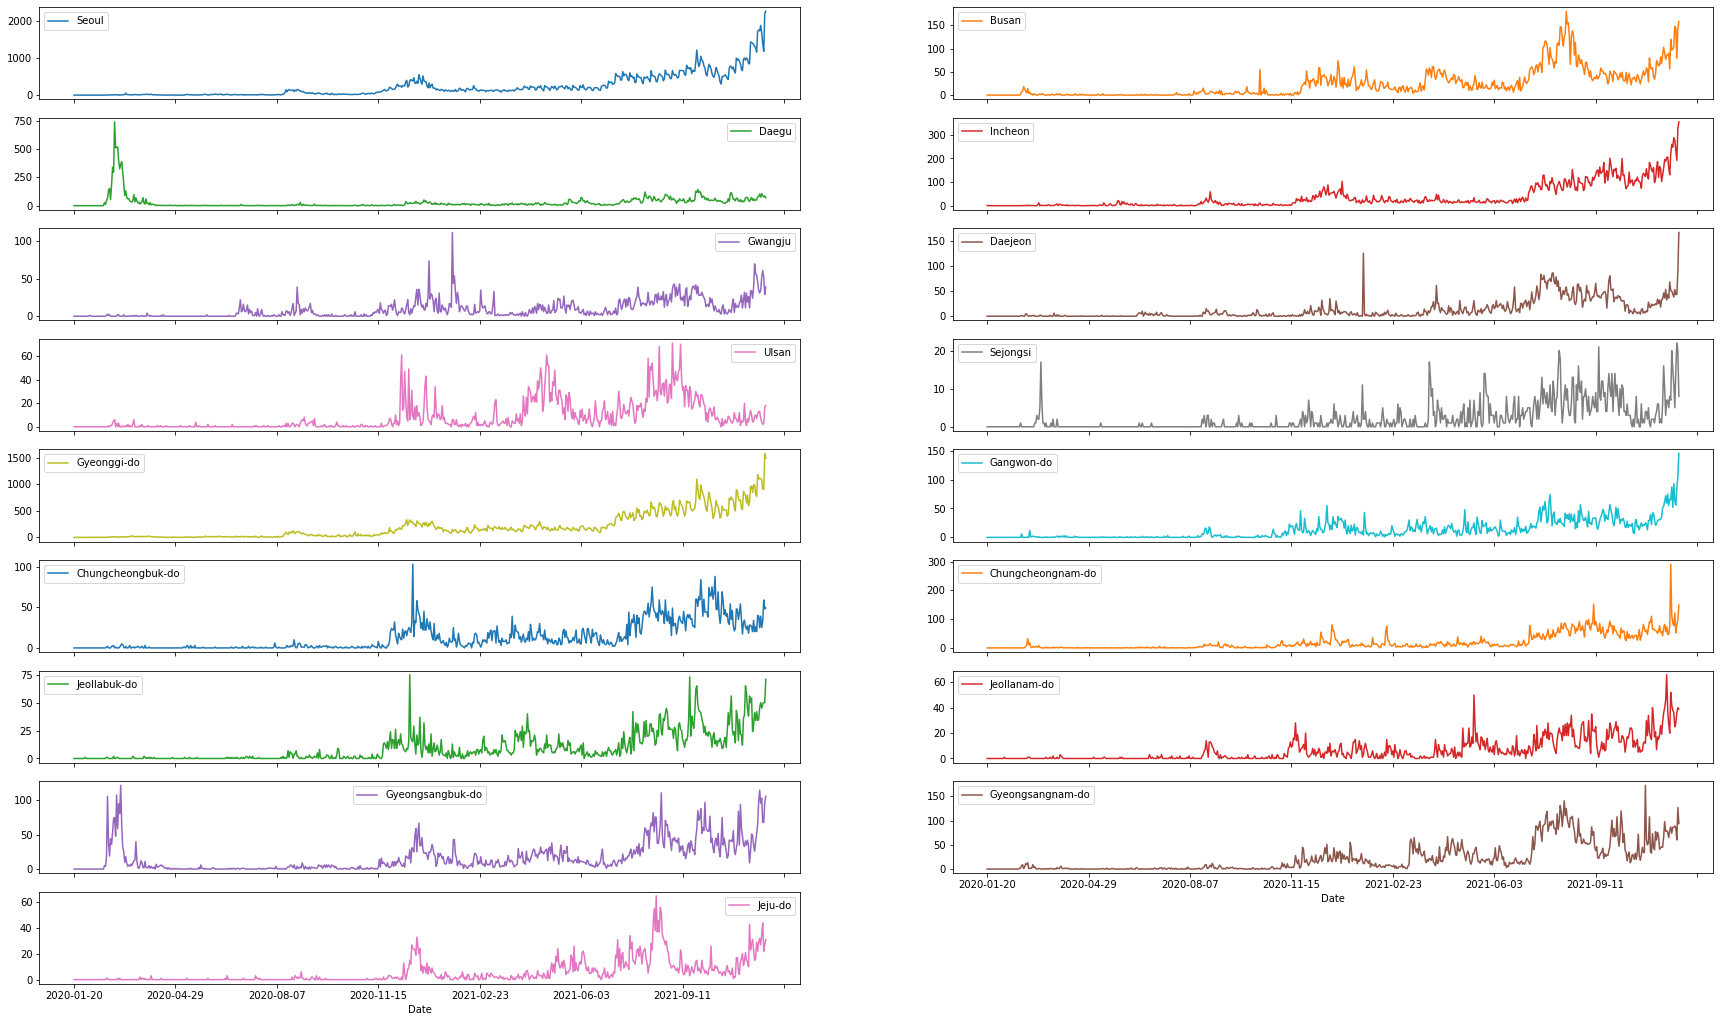

In [70]:
_df.reset_index().rename(columns={'일자':'Date'}).plot.line(x='Date',subplots=True,layout=(10,2),figsize=(30,20))

In [18]:
_df=_

In [19]:
_df.columns=[global_dict['features'][i]['properties']['name_eng'] for i in range(17)]

In [20]:
_df.applymap(lambda x: x.replace(',','') if x!='-' else 0).applymap(lambda x: float(x) if x!=0 else 0).reset_index().melt('일자')

,일자,variable,value
0,2020-01-20,Seoul,0.0
1,2020-01-21,Seoul,0.0
2,2020-01-22,Seoul,0.0
3,2020-01-23,Seoul,0.0
4,2020-01-24,Seoul,1.0
...,...,...,...
11606,2021-11-28,Jeju-do,35.0
11607,2021-11-29,Jeju-do,44.0
11608,2021-11-30,Jeju-do,22.0
11609,2021-12-01,Jeju-do,27.0


In [21]:
_df2=_

#### `(2)` `(1)`과 같은 시각화를 `plotly` backend를 이용하여 시각화 하라. 시각화 예시는 아래와 같다.

**(주의) 판다스백엔드를 이용하지 않을 경우 정답으로 인정하지 않음.** 

In [22]:
#hide_input
HTML(requests.get('https://raw.githubusercontent.com/guebin/2021DV/master/_notebooks/_html2').text)

**힌트1**. 적당한 데이터프레임으로 변경한 이후 아래의 코드를 활용하여 시각화 하라. 

```python
fig=df.plot.line(backend='plotly',
                 x=??,
                 y=??,
                 color=??,
                 facet_col=??,
                 facet_col_wrap=3, 
                 facet_col_spacing=0.04
                 height=1000)
fig.update_yaxes(matches=None,showticklabels=True) 
```

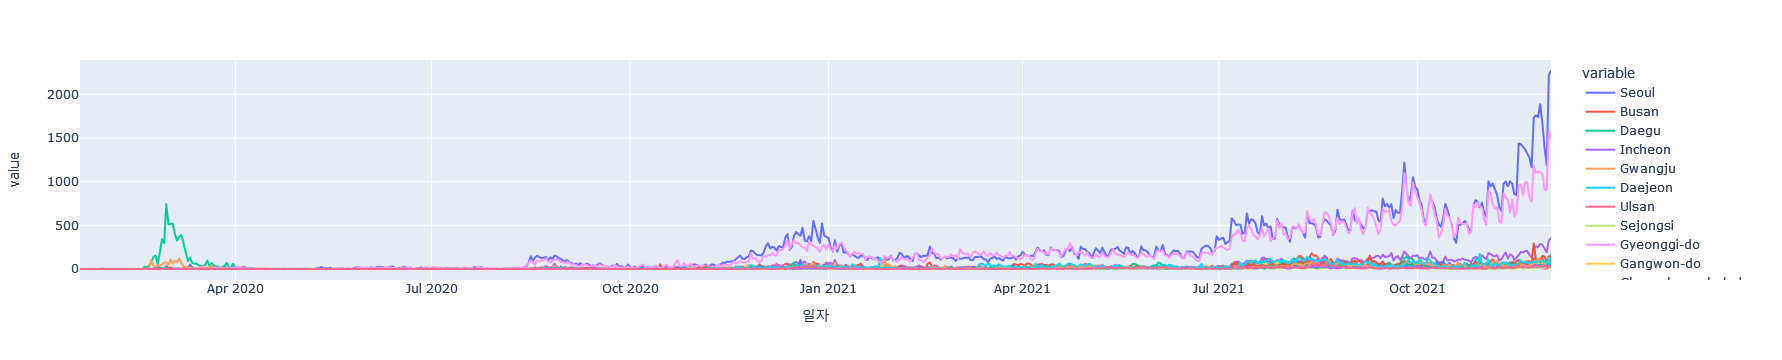

In [459]:
_df2.plot.line(x='일자',y='value',color='variable',backend='plotly')

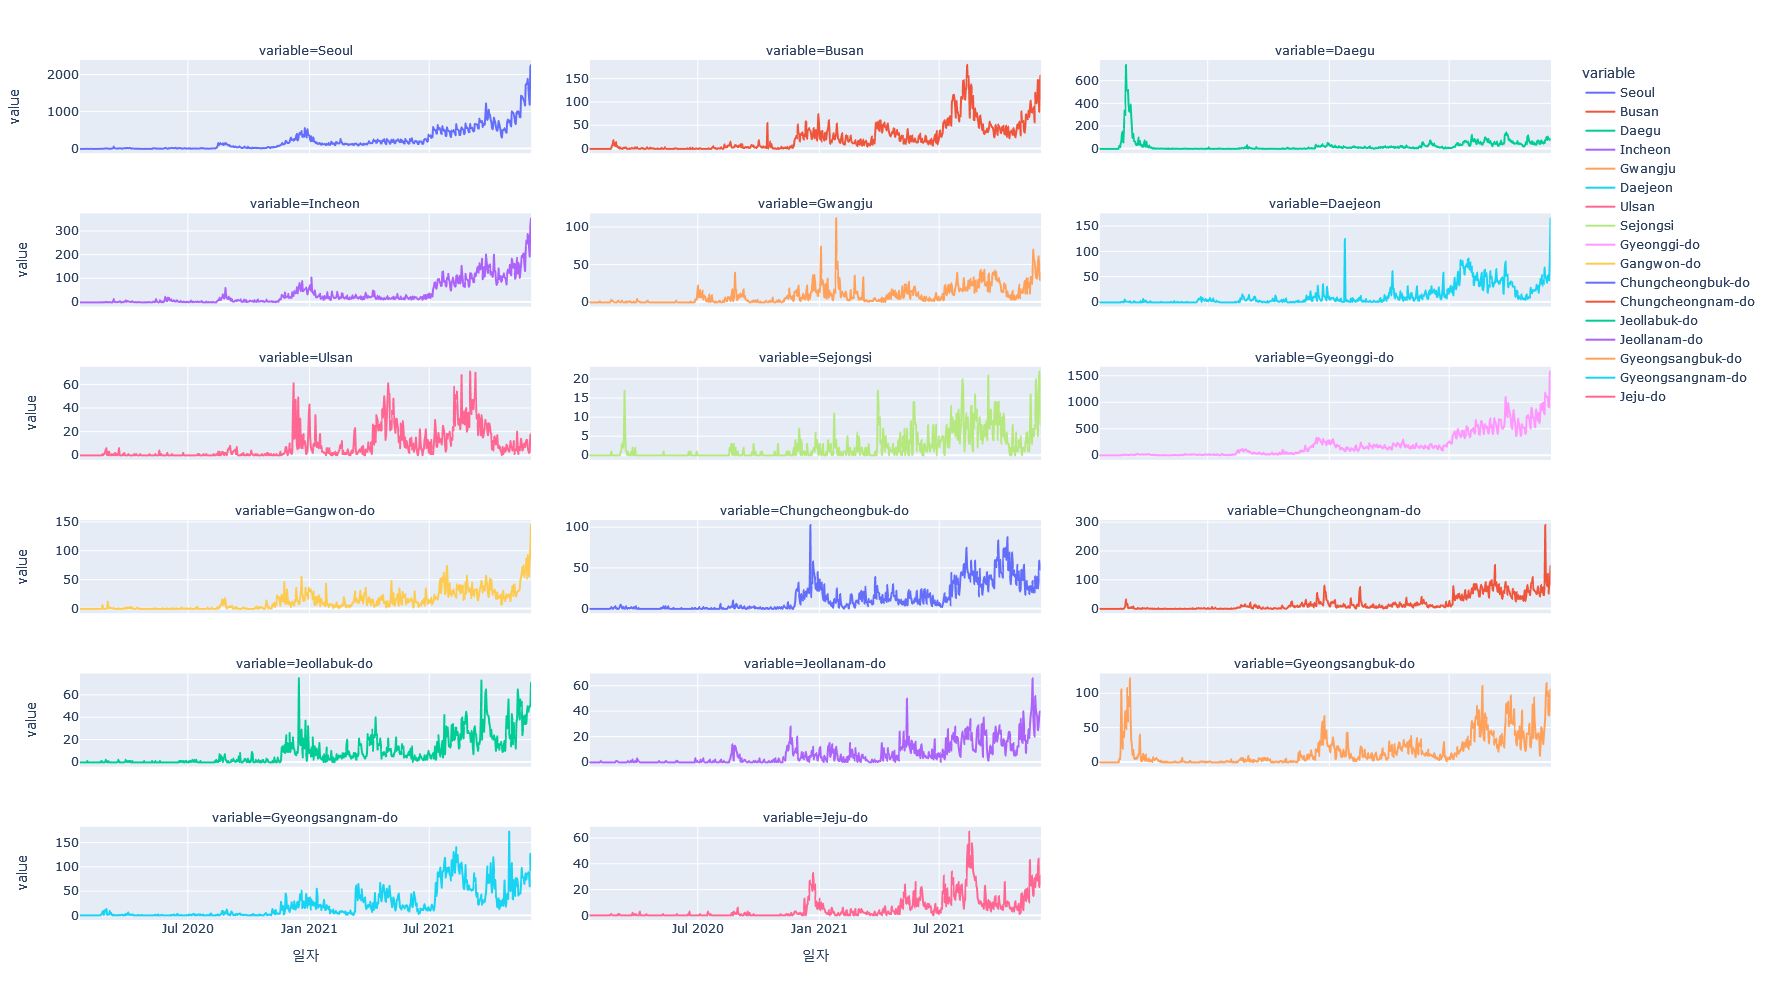

In [460]:
fig=_df2.plot.line(backend='plotly',
                 x='일자',
                 y='value',
                 color='variable',
                 facet_col='variable',
                 facet_col_wrap=3, 
                 facet_col_spacing=0.04,
                 height=1000)
fig.update_yaxes(matches=None,showticklabels=True) 

## `#4`. FIFA22 시각화

In [39]:
df=pd.read_csv('https://raw.githubusercontent.com/guebin/2021DV/master/_notebooks/2021-10-25-FIFA22_official_data.csv')

아래는 `FIFA22`라는 온라인게임에서 선수들의 능력치가 저정된 url이다. 
```
https://raw.githubusercontent.com/guebin/2021DV/master/_notebooks/2021-10-25-FIFA22_official_data.csv
```
판다스를 이용하여 위의 데이터를 불러온 이후 물음에 답하라. 

#### `(1)` 한국선수와 일본선수간 평균능력치를 barplot을 이용하여 비교하라. 비교하고 싶은 능력치의 목록은 아래와 같다. 

```python
abilities=['Crossing', 'Finishing','HeadingAccuracy','ShortPassing',
           'Volleys', 'Dribbling','Curve','FKAccuracy',
           'LongPassing','BallControl', 'Acceleration','SprintSpeed',
           'Agility', 'Reactions','Balance','ShotPower', 
           'Jumping', 'Stamina', 'Strength','LongShots',
           'Aggression','Interceptions', 'Positioning','Vision',
           'Penalties', 'Composure', 'StandingTackle','SlidingTackle']
```

**(주의) 판다스백엔드를 이용하지 않거나 아래의 시각화와 상이한 플랏이 그려질 경우 정답으로 인정하지 않음.** 

In [42]:
df.loc[:,['Crossing', 'Nationality','Finishing','HeadingAccuracy','ShortPassing',
           'Volleys', 'Dribbling','Curve','FKAccuracy',
           'LongPassing','BallControl', 'Acceleration','SprintSpeed',
           'Agility', 'Reactions','Balance','ShotPower', 
           'Jumping', 'Stamina', 'Strength','LongShots',
           'Aggression','Interceptions', 'Positioning','Vision',
           'Penalties', 'Composure', 'StandingTackle','SlidingTackle']].query('(Nationality=="Japan") or (Nationality=="Korea Republic")').\
melt(id_vars='Nationality').groupby(['Nationality','variable']).agg(np.mean).reset_index()

,Nationality,variable,value
0,Japan,Acceleration,67.313380
1,Japan,Aggression,54.742958
2,Japan,Agility,68.630282
3,Japan,Balance,68.366197
4,Japan,BallControl,62.285211
5,Japan,Composure,58.926056
6,Japan,Crossing,54.419014
7,Japan,Curve,51.179577
8,Japan,Dribbling,59.528169
9,Japan,FKAccuracy,46.570423


In [43]:
_df=_

In [46]:
_df['value']=round(_df['value'],2)

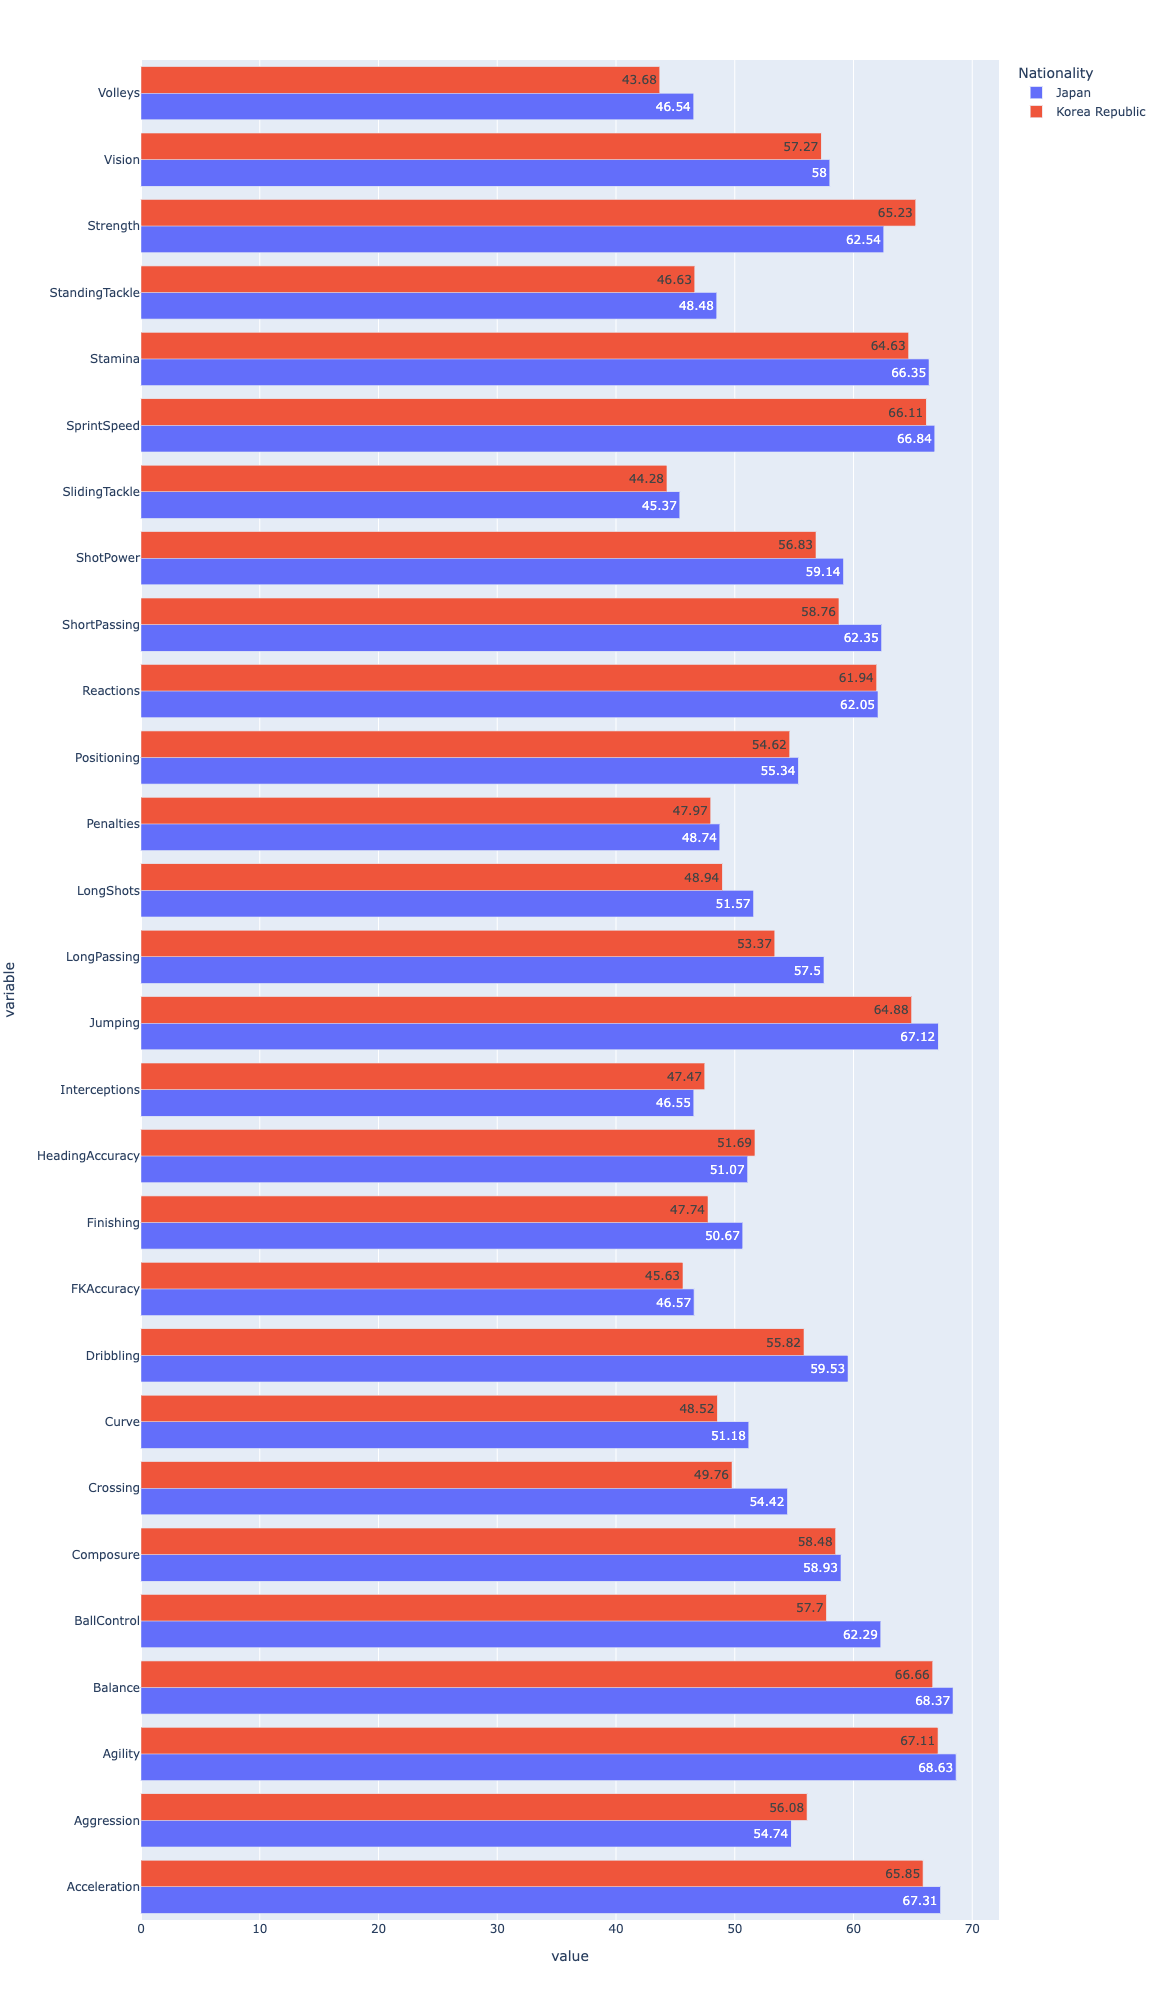

In [47]:
_df.plot.bar(x='value',y='variable',color='Nationality',backend='plotly',barmode='group',text='value',height=2000,width=1000)

In [462]:
#hide_input
HTML(requests.get('https://raw.githubusercontent.com/guebin/2021DV/master/_notebooks/_html3').text)

**힌트1**. 한국과 일본의 국가명은 각각 `Korea Republic`와 `Japan`으로 저장되어 있다. 

## `#5`. 정권별 GDP/소득불균형 시각화